In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename.endswith(".csv"):
            print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wids2022-lgbm-starter-w-b/submission.csv
/kaggle/input/wids2022-lgbm-starter-w-b/train_features.csv
/kaggle/input/dataset-new/y_test.csv
/kaggle/input/dataset-new/x_test.csv
/kaggle/input/dataset-new/train_dataset.csv


# A. Importing Libraries & Reading data

In [2]:
import shap
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
from copy import deepcopy
import joblib 
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from category_encoders import TargetEncoder



from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

In [3]:
data_link = "/kaggle/input/wids2022-lgbm-starter-w-b/train_features.csv"
site_EUI = pd.read_csv(data_link)
site_EUI1 = deepcopy(site_EUI)
site_EUI2 = deepcopy(site_EUI)
site_EUI3 = deepcopy(site_EUI)

In [4]:
site_EUI.shape

(75757, 62)

**Getting the details of columns of dataset and their statistics and the metadata of them**

In [5]:
site_EUI.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [6]:
len(site_EUI.columns)

62

In [7]:
site_EUI.describe()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog
count,75757.000000,75757.000000,75757.000000,75757.000000,7.575700e+04,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000
mean,4.367755,4.237998,0.574970,25.931914,1.659839e+05,1953.996726,61.048605,39.506323,11.432343,34.310468,...,4.886532,0.876764,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051
std,1.471441,1.549536,0.494351,11.645404,2.468758e+05,38.139247,23.063738,60.656596,9.381027,6.996108,...,7.071221,2.894244,25.282913,10.943996,2.252323,0.142140,88.726751,87.226977,4.369629,31.883663
min,1.000000,0.000000,0.000000,0.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000
25%,3.000000,4.000000,0.000000,27.000000,6.237900e+04,1927.000000,56.000000,11.900000,6.000000,29.827586,...,0.000000,0.000000,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,109.142051
50%,5.000000,5.000000,1.000000,27.000000,9.136700e+04,1953.000000,61.048605,25.000000,11.000000,34.451613,...,2.000000,0.000000,84.000000,12.000000,0.000000,0.000000,66.552675,62.779974,4.190601,109.142051
75%,6.000000,5.000000,1.000000,30.000000,1.660000e+05,1981.000000,76.000000,42.700000,13.000000,37.322581,...,7.000000,0.000000,97.000000,17.000000,0.000000,0.000000,66.552675,62.779974,4.190601,109.142051
max,6.000000,6.000000,1.000000,59.000000,6.385382e+06,2022.000000,100.000000,1924.500000,49.000000,64.758065,...,59.000000,31.000000,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000


* Observations:

1. As we can observe, there are lot of distributions in data where the the min-max values vary to a large extent, so we should have to normalize them at a point. 

In [8]:
site_EUI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 62 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  int64  
 2   building_class             75757 non-null  int64  
 3   facility_type              75757 non-null  int64  
 4   floor_area                 75757 non-null  float64
 5   year_built                 75757 non-null  float64
 6   energy_star_rating         75757 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

* Observations: 

1. There are object/categorical columns in the dataset given. 
2. All of them are numerical columns only.

**Checking If missing values exists or not**

In [9]:
site_EUI.isnull().sum().sum()

0

* Observations: 

1. There seems to be no null/missing values in the dataset.

**Checking Number of unique values in each column**

In [10]:
site_EUI.nunique(axis=0).head(30)

Year_Factor               6
State_Factor              7
building_class            2
facility_type            60
floor_area            20433
year_built              181
energy_star_rating      102
ELEVATION               193
january_min_temp         59
january_avg_temp        165
january_max_temp         49
february_min_temp        53
february_avg_temp       168
february_max_temp        43
march_min_temp           54
march_avg_temp          166
march_max_temp           42
april_min_temp           36
april_avg_temp          164
april_max_temp           33
may_min_temp             35
may_avg_temp            165
may_max_temp             39
june_min_temp            36
june_avg_temp           162
june_max_temp            43
july_min_temp            31
july_avg_temp           161
july_max_temp            41
august_min_temp          31
dtype: int64

In [11]:
site_EUI.nunique(axis=0).tail(32)

august_avg_temp              167
august_max_temp               42
september_min_temp            36
september_avg_temp           165
september_max_temp            39
october_min_temp              39
october_avg_temp             168
october_max_temp              37
november_min_temp             44
november_avg_temp            160
november_max_temp             38
december_min_temp             43
december_avg_temp            163
december_max_temp             39
cooling_degree_days          162
heating_degree_days          170
precipitation_inches         171
snowfall_inches               71
snowdepth_inches              60
avg_temp                     173
days_below_30F                82
days_below_20F                38
days_below_10F                30
days_below_0F                 19
days_above_80F               110
days_above_90F                87
days_above_100F               40
days_above_110F                9
direction_max_wind_speed      11
direction_peak_wind_speed      9
max_wind_s

**Let us work with train & test data**

In [12]:
train_data = pd.read_csv("/kaggle/input/dataset-new/train_dataset.csv")
test_data = pd.read_csv("/kaggle/input/dataset-new/x_test.csv")
train_data1 = deepcopy(train_data)
train_data2 = deepcopy(train_data)
train_data3 = deepcopy(train_data)
test_data1 = deepcopy(test_data)
test_data2 = deepcopy(test_data)
test_data3 = deepcopy(test_data)

In [13]:
print(f"Shape of training data: {train_data.shape}")
print(f"Shape of testing data: {test_data.shape}")

Shape of training data: (75757, 64)
Shape of testing data: (9705, 63)


In [14]:
print(f"Total there are {len(train_data.columns)} features")
print("\n-------------")
print(f"Features present in the data is: {train_data.columns}")

Total there are 64 features

-------------
Features present in the data is: Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degre

**Observations:**

1. As we can observe, the main dataset has 62 features which has the excluded features of 'site_eui' & 'id' which are included in train_data (has 64 features).

In [15]:
# Let us look at the dataset 
train_data.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [16]:
print(f"There are {len(test_data.columns)} features available in test_data")
print("\n----------->")
print(f"The features available are: {test_data.columns}")

There are 63 features available in test_data

----------->
The features available are: Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'co

In [17]:
test_data.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,29,5,2,0,340.0,330.0,22.8,126.0,75761


# B. EDA

In [18]:
# Let us check convert the upper case feature names into lower-case feature names.

train_data.rename(columns={
    'Year_Factor': 'year_factor', 
    'State_Factor': 'state_factor',
    'ELEVATION': 'elevation',
    'id': 'building_id'
}, inplace=True)

test_data.rename(columns={
    'Year_Factor': 'year_factor', 
    'State_Factor': 'state_factor',
    'ELEVATION': 'elevation',
    'id': 'building_id'
}, inplace=True)

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year_factor                75757 non-null  int64  
 1   state_factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   elevation                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [20]:
# Lets check for null values!
train_data.isnull().sum().sum()

198317

In [21]:
index = len(train_data.columns[train_data.isnull().sum()>0])

def nullValued(df):
    data = pd.DataFrame(columns=['Col','Count','Percent'])
    for col in df.columns:
        missingCount = df[col].isnull().sum()
        if missingCount>0:
            data=data.append({'Col':col,'Count':missingCount,'Percent':(100*missingCount)/len(train_data)},ignore_index=True)

    return data.sort_values(by=['Count'],ascending=False)
    
nullValued(train_data)

,Col,Count,Percent
5,days_with_fog,45796,60.451179
3,direction_peak_wind_speed,41811,55.190939
2,direction_max_wind_speed,41082,54.228652
4,max_wind_speed,41082,54.228652
1,energy_star_rating,26709,35.256148
0,year_built,1837,2.424858


**Observations:** 

1. There seems to be 198317 null values in dataset
2. For 4 columns, there are missing values more than 50% of data.

In [22]:
# for test_data
nullValued(test_data)

,Col,Count,Percent
5,days_with_fog,9117,12.034531
2,direction_max_wind_speed,8575,11.319086
3,direction_peak_wind_speed,8575,11.319086
4,max_wind_speed,8575,11.319086
1,energy_star_rating,2254,2.975303
0,year_built,92,0.121441


**Observations:** 

1. For test data, we have few missing values which are less than 15%.

In [23]:
numeric_cols = train_data.select_dtypes(include=np.number).columns
print(f"There are {len(numeric_cols)} numeric columns & {len(train_data.columns)-len(numeric_cols)} categoric columns in dataset")

There are 61 numeric columns & 3 categoric columns in dataset


In [24]:
numeric_cols_test = test_data.select_dtypes(include=np.number).columns
print(f"There are {len(numeric_cols_test)} numeric columns & {len(test_data.columns)-len(numeric_cols_test)} categoric columns in dataset")

There are 60 numeric columns & 3 categoric columns in dataset


**Let's visualize the things before dealing with null values**

In [25]:
test_data1['site_eui'] = np.nan #63
test_data1['dataset'] = 'test'
train_data1['dataset'] = 'train'
df = pd.concat([train_data1, test_data1], axis=0, ignore_index=True)

In [26]:
df.shape

(85462, 65)

In [27]:
df.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

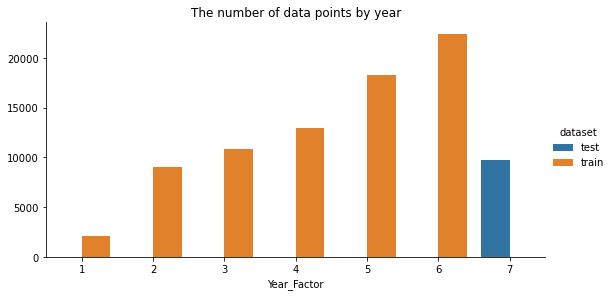

In [28]:
# Lets plot year_factor datapoints.
ax = sns.catplot(x='Year_Factor', 
                 y='id', 
                 data=df.groupby(['dataset','Year_Factor']).agg({'id':'count'}).reset_index(),
                 hue='dataset',
                 kind='bar',
                 aspect=2,
                 height=4).set(title="The number of data points by year",
     ylabel=None)


**Observations**:

1. Data recorded in train dataset in first set of years(6).
2. For test dataset, they recorded in only in 7th year.

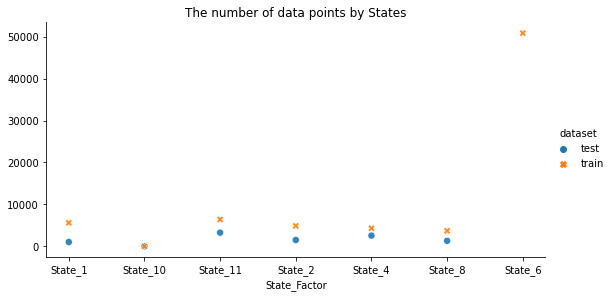

In [29]:
# Lets deal with state_factor

ax = sns.relplot(x='State_Factor', 
                 y='id', 
                 data=df.groupby(['dataset','State_Factor']).agg({'id':'count'}).reset_index(),
                 hue='dataset',
                 style='dataset',
                 aspect=2,
                 height=4,
                 s=50,
                 alpha=0.9).set(title = "The number of data points by States",ylabel=None)


**Observations:**

1. Train set has recorded values of state_1, state_2, state_4,state_6,state_8,state_11.
2. Test set has recorded values of state_1,state_2,state_4,state_8,state_11

Text(0.5, 0, '')

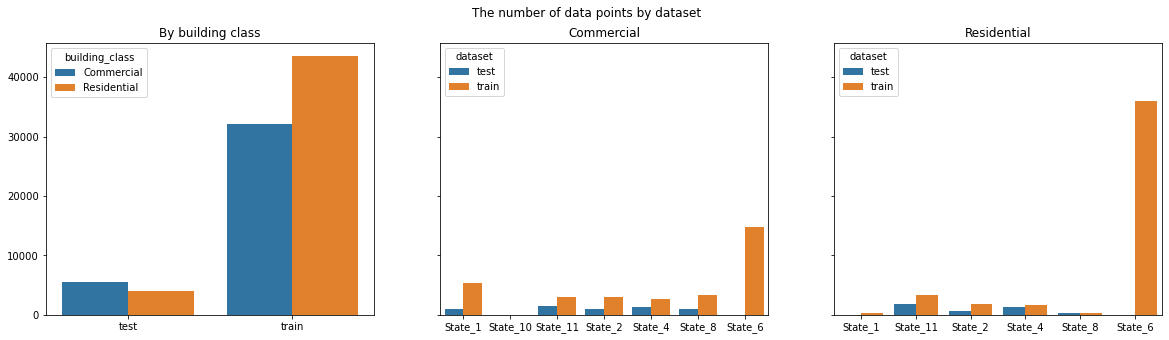

In [30]:
fig, ax = plt.subplots(1,3, figsize=(20,5), sharey=True)
fig.suptitle("The number of data points by dataset")

sns.barplot(x='dataset',
            y='id',
            data=df.groupby(['dataset','building_class']).agg({'id':'count'}).reset_index(),
            hue='building_class',
            ax=ax[0],
            ci=False)

for e, s in enumerate(df['building_class'].unique(),1):
    sns.barplot(x='State_Factor',
                y='id',
                data=df[df['building_class']==s].groupby(['dataset','State_Factor']).agg({'id':'count'}).reset_index(),
                hue='dataset',
                ax=ax[e],
                ci=False)
    ax[e].set_title(s)
    ax[e].set_ylabel("")
    ax[e].set_xlabel("")

ax[0].set_title("By building class")
ax[0].set_ylabel("")
ax[0].set_xlabel("")

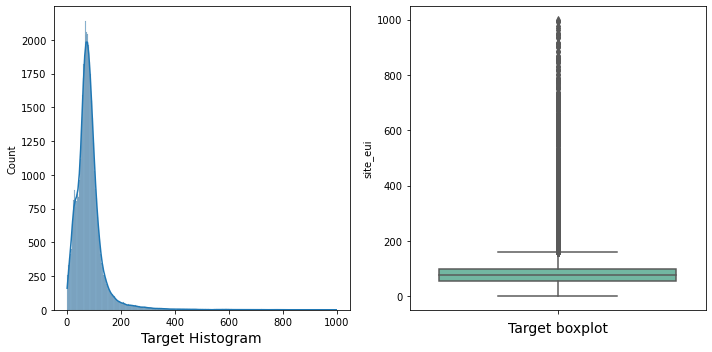

In [31]:
# Target Variable.
plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
cp = sns.histplot(x=df['site_eui'], kde=True, palette='Set2')
ax1.set_xlabel('Target Histogram', fontsize=14)
ax2 = plt.subplot(1,2,2)
sns.boxplot(y=df['site_eui'], palette='Set2')
ax2.set_xlabel('Target boxplot', fontsize=14)
plt.tight_layout();

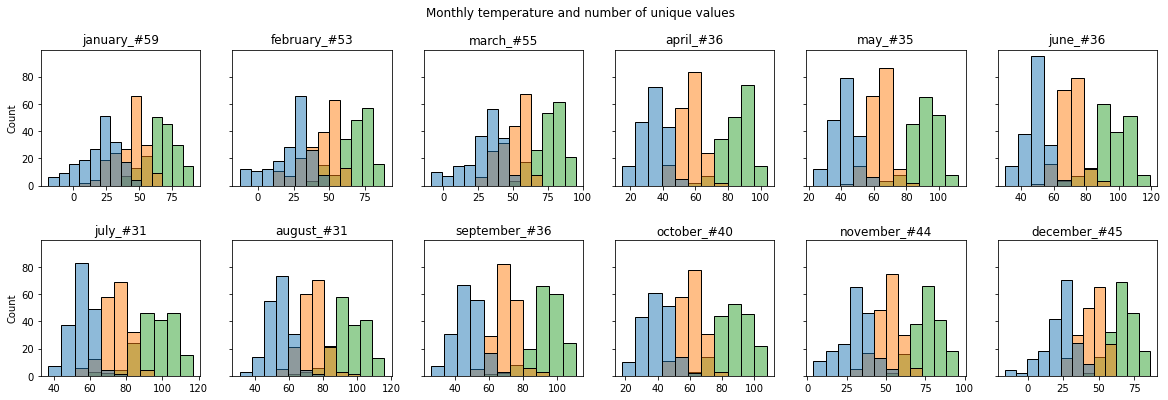

In [32]:
cols = [['january_min_temp', 'january_avg_temp', 'january_max_temp'],
        ['february_min_temp', 'february_avg_temp', 'february_max_temp'],
        ['march_min_temp', 'march_avg_temp', 'march_max_temp'], 
        ['april_min_temp','april_avg_temp', 'april_max_temp'], 
        ['may_min_temp', 'may_avg_temp','may_max_temp'], 
        ['june_min_temp', 'june_avg_temp', 'june_max_temp'],
        ['july_min_temp', 'july_avg_temp', 'july_max_temp'], 
        ['august_min_temp','august_avg_temp', 'august_max_temp'], 
        ['september_min_temp','september_avg_temp', 'september_max_temp'], 
        ['october_min_temp','october_avg_temp', 'october_max_temp'], 
        ['november_min_temp','november_avg_temp', 'november_max_temp'], 
        ['december_min_temp','december_avg_temp', 'december_max_temp']]
        
fig, ax = plt.subplots(2, 6, figsize=(20,6), sharey=True)
fig.suptitle("Monthly temperature and number of unique values")

for e, c in enumerate(cols):
    if e<=5:
        sns.histplot(df[c].drop_duplicates(), ax=ax[0,e], legend=False)\
        .set(title=c[0][:c[0].find('_')]+ '_#'+str(len(df[c[0]].unique())))
    else:
        sns.histplot(df[c].drop_duplicates(), ax=ax[1,e-6], legend=False)\
        .set(title=c[0][:c[0].find('_')]+ '_#'+str(len(df[c[0]].unique())))
        
plt.subplots_adjust(hspace=0.4)

# C. Pre-processing

In [33]:
groupby_cols = ['State_Factor','building_class','facility_type','floor_area','year_built']
df = df.sort_values(by=groupby_cols+['Year_Factor']).reset_index(drop=True)

df.loc[:,df.dtypes=='object'].columns

Index(['State_Factor', 'building_class', 'facility_type', 'dataset'], dtype='object')

In [34]:
cats = ['State_Factor', 'facility_type', 'building_class']
for col in cats:
    dummies = pd.get_dummies(df[col], dummy_na=False)
    for ohe_col in dummies:
        df[f'ohe_{col}_{ohe_col}'] = dummies[ohe_col]

In [35]:
knn_imputing = True
target='site_eui'

if knn_imputing:
    imputer = KNNImputer(n_neighbors=7)
    tmp = df[['State_Factor', 'building_class', 'facility_type', 'dataset', target]]
    df_new = df.drop(tmp.columns, axis=1)
    df1 = pd.DataFrame(imputer.fit_transform(df_new),columns = df_new.columns)
    

else:
    df1 = pd.read_csv('/kaggle/working/imputer_df1.csv')
    tmp = df[['State_Factor', 'building_class', 'facility_type', 'dataset', target]]
    df = df.drop(tmp.columns, axis=1)
    
    for col in tmp.columns:
        df[col]=tmp[col]
    for col in df1.columns:
        df[col] = df1[col]

In [36]:
tmp.to_csv('/kaggle/working/imputer_tmp.csv', index=False)
df1.to_csv('/kaggle/working/imputer_df1.csv', index=False)
joblib.dump(imputer, '/kaggle/working/knn_imputer.pkl')


['/kaggle/working/knn_imputer.pkl']

In [37]:
df_new.isnull().sum().sum()


235505

In [38]:
categoric_cols = train_data1.select_dtypes(include=np.object).columns
print(categoric_cols)

Index(['State_Factor', 'building_class', 'facility_type', 'dataset'], dtype='object')


`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [39]:
cats = ['State_Factor', 'building_class', 'facility_type']
for col in cats:
    encoder = TargetEncoder()
    df[f'te_{col}'] = encoder.fit_transform(df[col], df[target])

In [40]:
# Lets get some statistics which we will be used for feature engineering process.
# extract new weather statistics from the building location weather features
temp = [col for col in df.columns if 'temp' in col]

df['min_temp'] = df[temp].min(axis=1)
df['max_temp'] = df[temp].max(axis=1)
df['avg_temp'] = df[temp].mean(axis=1)
df['std_temp'] = df[temp].std(axis=1)
df['skew_temp'] = df[temp].skew(axis=1)


# by seasons
temp = pd.Series([col for col in df.columns if 'temp' in col])

winter_temp = temp[temp.apply(lambda x: ('january' in x or 'february' in x or 'december' in x))].values
spring_temp = temp[temp.apply(lambda x: ('march' in x or 'april' in x or 'may' in x))].values
summer_temp = temp[temp.apply(lambda x: ('june' in x or 'july' in x or 'august' in x))].values
autumn_temp = temp[temp.apply(lambda x: ('september' in x or 'october' in x or 'november' in x))].values


### winter
df['min_winter_temp'] = df[winter_temp].min(axis=1)
df['max_winter_temp'] = df[winter_temp].max(axis=1)
df['avg_winter_temp'] = df[winter_temp].mean(axis=1)
df['std_winter_temp'] = df[winter_temp].std(axis=1)
df['skew_winter_temp'] = df[winter_temp].skew(axis=1)
### spring
df['min_spring_temp'] = df[spring_temp].min(axis=1)
df['max_spring_temp'] = df[spring_temp].max(axis=1)
df['avg_spring_temp'] = df[spring_temp].mean(axis=1)
df['std_spring_temp'] = df[spring_temp].std(axis=1)
df['skew_spring_temp'] = df[spring_temp].skew(axis=1)
### summer
df['min_summer_temp'] = df[summer_temp].min(axis=1)
df['max_summer_temp'] = df[summer_temp].max(axis=1)
df['avg_summer_temp'] = df[summer_temp].mean(axis=1)
df['std_summer_temp'] = df[summer_temp].max(axis=1)
df['skew_summer_temp'] = df[summer_temp].max(axis=1)
## autumn
df['min_autumn_temp'] = df[autumn_temp].min(axis=1)
df['max_autumn_temp'] = df[autumn_temp].max(axis=1)
df['avg_autumn_temp'] = df[autumn_temp].mean(axis=1)
df['std_autumn_temp'] = df[autumn_temp].std(axis=1)
df['skew_autumn_temp'] = df[autumn_temp].skew(axis=1)

In [41]:
# type of days
df['month_cooling_degree_days'] = df['cooling_degree_days']/12
df['month_heating_degree_days'] = df['heating_degree_days']/12
# total area
df['building_area'] = df['floor_area'] * df['ELEVATION']
# rating energy by floor
df['floor_energy_star_rating'] = df['energy_star_rating']/df['ELEVATION']

Text(0.5, 0, 'Site_EUI site_eui')

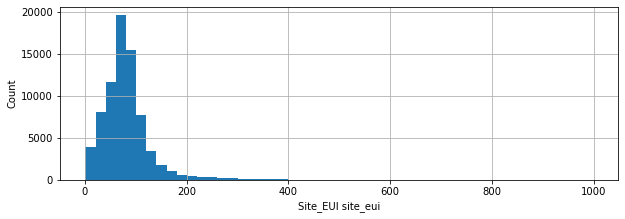

In [42]:
# Target variable, plotting site_eui v/s sale 
target = 'site_eui'
plt.figure(figsize=(10,7))  
plt.subplot(2, 1, 1)
train = deepcopy(train_data1)
test = deepcopy(test_data1)
train[target].hist(bins=50)
plt.ylabel('Count')
plt.xlabel('Site_EUI ' + target)

Text(0.5, 0, 'log Transformed Site_EUIsite_eui')

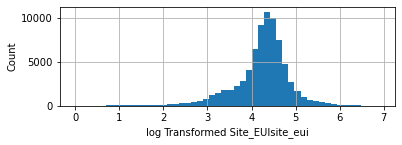

In [43]:
# Target variable, plotting log-transformed value of site_EUI  vs sale price
plt.subplot(2, 1, 2)
np.log(train[target]).hist(bins=50)
plt.ylabel('Count')
plt.xlabel('log Transformed Site_EUI' + target)

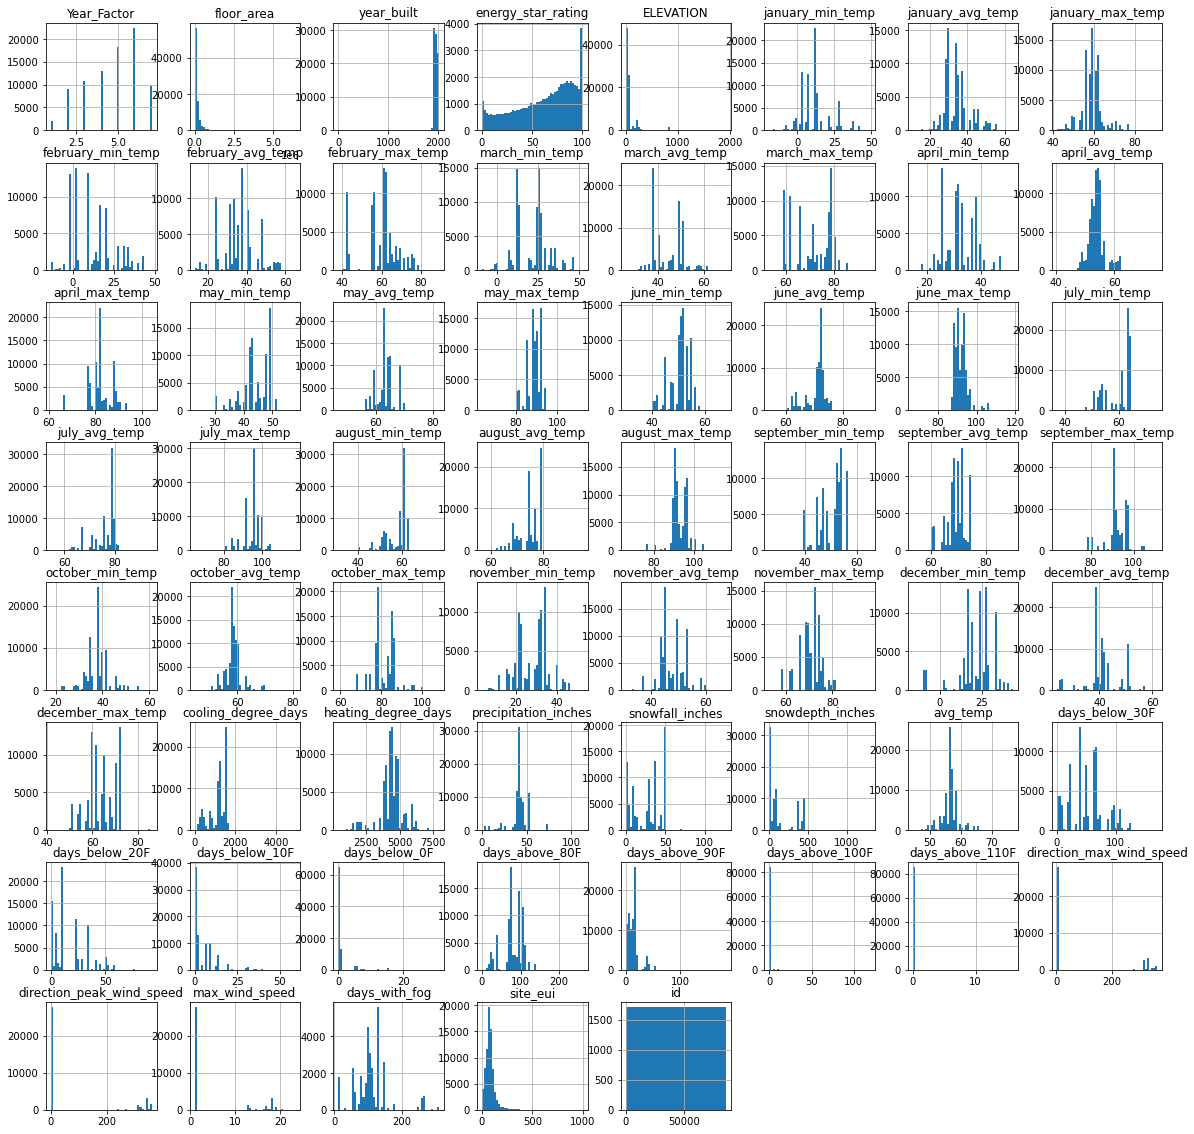

In [44]:
# Plotting all respective histograms for numerical train features
nums = train.loc[:, train.dtypes != 'object'].columns
df[nums].hist(bins=50, figsize=(20,20))
plt.show()

In [45]:
# Let us check the skewed numerical columns
# which is asymmetry of the probability distribution of a random variable about its mean.
# at which, the values of particular column are present
df[nums].skew().sort_values(key=abs, ascending=False)[:5]

days_above_110F    89.873857
days_above_100F    24.615438
year_built        -11.706906
floor_area          6.701786
ELEVATION           5.140444
dtype: float64

**Observations:**

1. As we can note, the features 'days_above_110F' & 'days_above_100F' have high right skewed distribution among the features

In [46]:
# These are skewed at right side which is far away from mean, so lets make them near to mean,
# by mapping to values btwn 0 & 1.
skewed = ['days_above_110F', 'days_above_100F']

for var in skewed:
    # map the variable values into 0 and 1
    df[var] = np.where(df[var]==0, 0, 1)

In [47]:
saved = False
if saved:
    !pip install pickle5 --quiet
    import pickle5 as pickle
    data_path = 'data/feature_transformed_set.pkl'
    with open(data_path, "rb") as fh:
        df = pickle.load(fh)
else:
    df.to_pickle('/kaggle/working/feature_transformed_set.pkl')

# D. Modelling

In [48]:
categorics = ['State_Factor', 'facility_type', 'building_class', 'days_above_100F', 'days_above_110F']

# typecasting numerical features
for col in df.drop(columns=categorics + ['dataset', 'id', 'site_eui']).columns:
    df[col] = df[col].astype('float64')

In [49]:
# Let us drop categoric columns, as they dont add value to mathematical learning of model,
df.drop(columns=categorics)

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,skew_summer_temp,min_autumn_temp,max_autumn_temp,avg_autumn_temp,std_autumn_temp,skew_autumn_temp,month_cooling_degree_days,month_heating_degree_days,building_area,floor_energy_star_rating
0,3.0,10149.0,1931.0,NaN,45.7,26.0,44.516129,64.0,30.0,49.392857,...,104.0,36.0,98.0,63.361111,20.462133,0.360253,68.833333,211.833333,463809.3,NaN
1,4.0,10149.0,1931.0,NaN,120.4,41.0,55.096774,73.0,42.0,54.875000,...,90.0,46.0,95.0,67.521625,15.342943,0.494753,41.416667,123.083333,1221939.6,NaN
2,5.0,10149.0,1931.0,NaN,59.1,29.0,51.387097,77.0,36.0,56.803571,...,106.0,29.0,105.0,67.003405,23.881873,0.162329,109.916667,151.916667,599805.9,NaN
3,7.0,10149.0,1931.0,NaN,59.1,38.0,50.596774,64.0,40.0,54.482143,...,97.0,43.0,104.0,66.778913,19.843743,0.883927,28.500000,176.000000,599805.9,NaN
4,3.0,10755.0,1937.0,NaN,9.1,22.0,44.790323,65.0,25.0,47.892857,...,99.0,31.0,96.0,60.048268,22.548770,0.276234,25.250000,259.000000,97870.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85457,7.0,900000.0,1960.0,90.0,130.8,2.0,33.435484,61.0,16.0,37.660714,...,91.0,17.0,91.0,55.995818,24.752362,-0.095805,72.166667,438.666667,117720000.0,0.688073
85458,6.0,1179072.0,1959.0,96.0,3.0,8.0,29.827586,62.0,4.0,33.896552,...,96.0,20.0,96.0,55.974970,26.286606,0.078569,92.833333,422.833333,3537216.0,32.000000
85459,7.0,1179072.0,1959.0,92.0,130.8,2.0,33.435484,61.0,16.0,37.660714,...,91.0,17.0,91.0,55.995818,24.752362,-0.095805,72.166667,438.666667,154222617.6,0.703364
85460,6.0,1195034.0,1964.0,75.0,3.0,8.0,29.827586,62.0,4.0,33.896552,...,96.0,20.0,96.0,55.974970,26.286606,0.078569,92.833333,422.833333,3585102.0,25.000000


In [50]:
train = df[df['dataset']=='train']
test = df[df['dataset']=='test']

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

test_ids = test['id']
train_ids = train['id']

target = train['site_eui'] #y_train

train = train.drop(['id', 'dataset', 'site_eui'], axis=1) #X_train
test = test.drop(['id', 'dataset', 'site_eui'], axis=1) #X_test

In [51]:
#Label Encoding:
# _--------------------------_
#get discrete end categorical features colums indexes 
# needed later for the cat bosst model
cats_discrete_idx = np.where(train.dtypes != 'float64')[0]
# create the label
le = LabelEncoder()
for col_idx in cats_discrete_idx:
    train.iloc[:, col_idx] = le.fit_transform(train.iloc[:, col_idx].astype(str))
    test.iloc[:, col_idx] = le.transform(test.iloc[:, col_idx].astype(str))

In [52]:
print("Label Encoded Columns:")
for i in cats_discrete_idx:
    print(train.columns[i])

Label Encoded Columns:
State_Factor
building_class
facility_type
days_above_100F
days_above_110F


In [53]:
y_test = pd.read_csv('/kaggle/input/dataset-new/y_test.csv')

X_train = train
X_test = test
y_train = target
y_test = y_test['site_eui']
print('Train: ', X_train.shape)
print('Test:', X_test.shape)
print('Samples: ', y_train.shape)
print('Targets: ', y_test.shape)

Train:  (75757, 162)
Test: (9705, 162)
Samples:  (75757,)
Targets:  (9705,)


In [54]:
## XGBOOST Model
xgb = XGBRegressor(n_estimators=500, reg_alpha=0.01, n_jobs=-1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 Training data scores
 --------------------
 RMSE: 82.32512333621314
 MAE: 53.24119601711114
 MSE: 6777.425932322706
 R2: -0.8744553157170756


In [55]:
catb = CatBoostRegressor(iterations=500,
                         learning_rate=0.02,
                         depth=12,
                         eval_metric='RMSE',
#                         early_stopping_rounds=42,
                         random_seed = 23,
                         bagging_temperature = 0.2,
                         od_type='Iter',
                         metric_period = 75,
                         od_wait=100
                        )

catb.fit(X_train, y_train,
                 eval_set=(X_test,y_test),
                 cat_features=cats_discrete_idx,
                 use_best_model=True,
                 verbose=True)

y_pred = catb.predict(X_test)

0:	learn: 57.8398094	test: 61.1764843	best: 61.1764843 (0)	total: 496ms	remaining: 4m 7s
75:	learn: 44.5730905	test: 68.5774460	best: 61.1764843 (0)	total: 30.9s	remaining: 2m 52s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 61.1764843
bestIteration = 0

Shrink model to first 1 iterations.


In [56]:
print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 Training data scores
 --------------------
 RMSE: 61.17648432057657
 MAE: 40.25416185516794
 MSE: 3742.5622338257513
 R2: -0.03509293109934952


# E. Model Evaluation

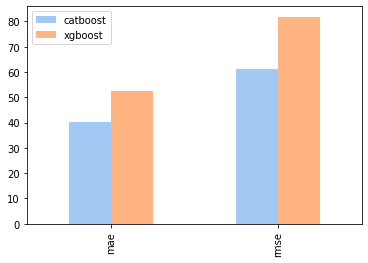

In [57]:
error_rec = {
    "catboost": {
            "mae": 40.29268484855883,
            "rmse": 61.19378120765249,
    },
    "xgboost": {
        "mae": 52.41012420250038,
        "rmse": 81.8514058171361,
    },
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3]]);

# F. Hyper-Parameter Tuning

In [64]:

from sklearn.model_selection import cross_val_score, KFold, train_test_split
import tqdm

# prepaere the out of folds predictions 
train_oof = np.zeros((train.shape[0],))
test_preds = np.zeros(test.shape[0])

NUM_FOLDS = 5
kf = KFold(n_splits = NUM_FOLDS, shuffle=True, random_state=0)


for fold, (train_idx, test_idx) in tqdm.tqdm(enumerate(kf.split(train, target))):
    X_train, X_test = train.iloc[train_idx][test.columns], train.iloc[test_idx][test.columns]
    y_train, y_test = target[train_idx], target[test_idx]
    
    catb = CatBoostRegressor(iterations=500,
                         learning_rate=0.02,
                         depth=12,
                         eval_metric='RMSE',
#                         early_stopping_rounds=42,
                         random_seed = 23,
                         bagging_temperature = 0.2,
                         od_type='Iter',
                         metric_period = 75,
                         od_wait=100)
    # train model
    catb.fit(X_train, y_train,
                 eval_set=(X_test,y_test),
                 cat_features=cats_discrete_idx,
                 use_best_model=True,
                 verbose=True)
    
    oof = catb.predict(X_test)
    train_oof[test_idx] = oof
    test_preds += catb.predict(test)/NUM_FOLDS      
    print(f"out-of-folds prdiction ==== fold_{fold} RMSE",np.sqrt(mean_squared_error(oof, y_test, squared=False)))



0it [00:00, ?it/s]Warning: Overfitting detector is active, thus evaluation metric is calculated on every iteration. 'metric_period' is ignored for evaluation metric.


0:	learn: 58.1285335	test: 57.0669508	best: 57.0669508 (0)	total: 359ms	remaining: 2m 59s
75:	learn: 45.1268857	test: 44.5181721	best: 44.5181721 (75)	total: 28s	remaining: 2m 36s
150:	learn: 41.9392891	test: 42.1649654	best: 42.1649654 (150)	total: 55.2s	remaining: 2m 7s
225:	learn: 40.5939728	test: 41.5077868	best: 41.5077868 (225)	total: 1m 22s	remaining: 1m 39s
300:	learn: 39.6441514	test: 41.1640659	best: 41.1640659 (300)	total: 1m 48s	remaining: 1m 12s
375:	learn: 38.8529745	test: 40.8946020	best: 40.8946020 (375)	total: 2m 15s	remaining: 44.7s
450:	learn: 38.2420858	test: 40.7058877	best: 40.7049588 (448)	total: 2m 40s	remaining: 17.5s
499:	learn: 37.8353697	test: 40.5498376	best: 40.5498376 (499)	total: 2m 58s	remaining: 0us

bestTest = 40.54983764
bestIteration = 499



1it [02:59, 179.53s/it]

out-of-folds prdiction ==== fold_0 RMSE 6.367875438037132


0:	learn: 58.0150324	test: 57.4846094	best: 57.4846094 (0)	total: 357ms	remaining: 2m 58s
75:	learn: 44.8738134	test: 45.1981172	best: 45.1981172 (75)	total: 27.1s	remaining: 2m 31s
150:	learn: 41.7527146	test: 42.9437590	best: 42.9437590 (150)	total: 53.9s	remaining: 2m 4s
225:	learn: 40.3259046	test: 42.1411046	best: 42.1411046 (225)	total: 1m 20s	remaining: 1m 37s
300:	learn: 39.4657872	test: 41.8216392	best: 41.8216392 (300)	total: 1m 46s	remaining: 1m 10s
375:	learn: 38.7509786	test: 41.5535394	best: 41.5535394 (375)	total: 2m 13s	remaining: 43.9s
450:	learn: 38.1226182	test: 41.3870593	best: 41.3870593 (450)	total: 2m 39s	remaining: 17.3s
499:	learn: 37.7293155	test: 41.2441894	best: 41.2441894 (499)	total: 2m 56s	remaining: 0us

bestTest = 41.24418942
bestIteration = 499



2it [05:56, 177.99s/it]

out-of-folds prdiction ==== fold_1 RMSE 6.422163918133698


0:	learn: 57.7035095	test: 58.5990386	best: 58.5990386 (0)	total: 474ms	remaining: 3m 56s
75:	learn: 44.2906000	test: 47.0559120	best: 47.0559120 (75)	total: 28.3s	remaining: 2m 37s
150:	learn: 41.1131456	test: 45.2735057	best: 45.2735057 (150)	total: 55.8s	remaining: 2m 8s
225:	learn: 39.6189748	test: 44.6864222	best: 44.6864222 (225)	total: 1m 23s	remaining: 1m 41s
300:	learn: 38.6432205	test: 44.3679610	best: 44.3679610 (300)	total: 1m 50s	remaining: 1m 13s
375:	learn: 37.8674144	test: 44.1830021	best: 44.1830021 (375)	total: 2m 18s	remaining: 45.6s
450:	learn: 37.2309213	test: 44.0693940	best: 44.0693940 (450)	total: 2m 45s	remaining: 18s
499:	learn: 36.8337338	test: 44.0163015	best: 44.0146139 (497)	total: 3m 3s	remaining: 0us

bestTest = 44.01461387
bestIteration = 497

Shrink model to first 498 iterations.


3it [09:00, 180.82s/it]

out-of-folds prdiction ==== fold_2 RMSE 6.634351059115803


0:	learn: 58.4549753	test: 55.3298950	best: 55.3298950 (0)	total: 367ms	remaining: 3m 3s
75:	learn: 45.0144943	test: 43.4535109	best: 43.4535109 (75)	total: 28.5s	remaining: 2m 39s
150:	learn: 41.8093888	test: 41.5760560	best: 41.5760560 (150)	total: 55.9s	remaining: 2m 9s
225:	learn: 40.3556586	test: 41.1284295	best: 41.1284295 (225)	total: 1m 23s	remaining: 1m 40s
300:	learn: 39.4896409	test: 40.9690955	best: 40.9685559 (299)	total: 1m 49s	remaining: 1m 12s
375:	learn: 38.8316509	test: 40.8408899	best: 40.8388167 (374)	total: 2m 16s	remaining: 45.2s
450:	learn: 38.1583204	test: 40.6548287	best: 40.6548287 (450)	total: 2m 42s	remaining: 17.7s
499:	learn: 37.8057980	test: 40.5897886	best: 40.5897886 (499)	total: 3m	remaining: 0us

bestTest = 40.58978857
bestIteration = 499



4it [12:01, 181.00s/it]

out-of-folds prdiction ==== fold_3 RMSE 6.371011581502388


0:	learn: 57.0827269	test: 60.8173569	best: 60.8173569 (0)	total: 367ms	remaining: 3m 3s
75:	learn: 44.0241361	test: 48.3064055	best: 48.3064055 (75)	total: 27.7s	remaining: 2m 34s
150:	learn: 41.0240756	test: 45.9294758	best: 45.9294758 (150)	total: 54.9s	remaining: 2m 6s
225:	learn: 39.7309070	test: 45.2161008	best: 45.2161008 (225)	total: 1m 21s	remaining: 1m 39s
300:	learn: 39.0170221	test: 44.8867694	best: 44.8863553 (299)	total: 1m 47s	remaining: 1m 10s
375:	learn: 38.3944623	test: 44.6301108	best: 44.6301108 (375)	total: 2m 12s	remaining: 43.8s
450:	learn: 37.8821237	test: 44.4758946	best: 44.4758946 (450)	total: 2m 38s	remaining: 17.2s
499:	learn: 37.5463054	test: 44.3703539	best: 44.3703539 (499)	total: 2m 56s	remaining: 0us

bestTest = 44.37035393
bestIteration = 499



5it [14:59, 179.88s/it]

out-of-folds prdiction ==== fold_4 RMSE 6.661107552723069


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Text(0.5, 0, 'iteration')

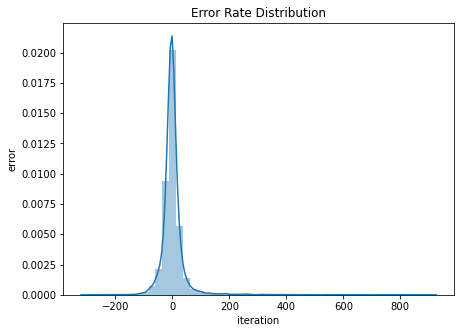

In [65]:
y_hat_tuned = catb.predict(X_test)

plt.figure(figsize = (7,5))
sns.distplot(y_test - y_hat_tuned)
plt.title("Error Rate Distribution");
plt.ylabel("error")
plt.xlabel("iteration")

# G. Saving Models

In [67]:

with open('/kaggle/working/catb_best_final1.joblib', 'wb') as f:
    joblib.dump(catb,f,compress=3)